# &#x1F4D1; &nbsp; <span style="color:navy"> $\mathfrak {Gradient \ Descent.\ Part\ 1.}$</span>

## Links

An overview of gradient descent optimization algorithms http://sebastianruder.com/optimizing-gradient-descent/

Gradient Descent For Machine Learning http://machinelearningmastery.com/gradient-descent-for-machine-learning/

Stochastic Gradient Descent http://scikit-learn.org/stable/modules/sgd.html

Introduction to Gradient Descent Algorithm (along with variants) in Machine Learning

https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/

An Introduction to Gradient Descent in Python http://tillbergmann.com/blog/python-gradient-descent.html

Gradient descent with Python http://www.pyimagesearch.com/2016/10/10/gradient-descent-with-python/

Logistic Regression with R https://www.r-bloggers.com/logistic-regression-with-r-step-by-step-implementation-part-2/

CS231n Convolutional Neural Networks for Visual Recognition http://cs231n.github.io/optimization-1/

rpy2 http://rpy2.readthedocs.io/en/version_2.8.x/introduction.html#getting-started

## Libraries

In [1065]:
import warnings
warnings.filterwarnings('ignore')

In [1066]:
import math, sys, os, time
import numpy as np, pandas as pd
import scipy as sp, random as rd
import argparse

In [1067]:
from matplotlib import pyplot as plt, rcParams, animation, rc
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *

In [1068]:
from sklearn.datasets.samples_generator import make_regression, make_blobs
from sklearn.linear_model import SGDClassifier, SGDRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [1069]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [1070]:
%%R
library(dplyr)
library(highcharter)
library(tidyr)
library(DataCombine)
library(corrplot)
library(DT)
library(ggplot2)
library(IRdisplay)

In [1071]:
%matplotlib inline

In [1072]:
rc('animation', html='html5')
rcParams['figure.figsize'] = 7, 7

In [1073]:
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [1074]:
from IPython.core.display import Image, HTML, display
from IPython.display import IFrame

## Notes

**Gradient descent (GD)** is a first-order iterative optimization algorithm. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point. If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.

**Batch (vanilla) gradient descent (BGD)** is one of the most common forms of gradient descent described in machine learning.

The cost function involves evaluating the coefficients in the machine learning model by calculating a prediction for the model for each training instance in the dataset and comparing the predictions to the actual output values and calculating a sum or average error.

The cost is calculated over the entire training dataset for each iteration of the gradient descent algorithm. One iteration of the algorithm is called one batch and this form of gradient descent is referred to as batch gradient descent.

BGD algorithm for linear regressions works by efficiently searching the parameter space, intercept ( $\theta_0$ ) and slope ( $\theta_1$ ), according to the following rule: $\theta := \theta − \alpha \frac{\delta}{\delta \theta} J(\theta),$ where $J(\theta)$ is the cost function and $\alpha$ is a free parameter (the learning rate).

**Stochastic gradient descent (SGD)**, also known as incremental gradient descent, is a stochastic approximation of the gradient descent optimization method for minimizing an objective function that is written as a sum of differentiable functions. In other words, SGD tries to find minima or maxima by iteration.

In contrast to (batch) gradient descent, SGD approximates the true gradient by considering a single training example at a time.

The first step of the procedure requires that the order of the training dataset is randomized. This is to mix up the order that updates are made to the coefficients. Because the coefficients are updated after every training instance, the updates will be noisy jumping all over the place, and so will the corresponding cost function. By mixing up the order for the updates to the coefficients, it harnesses this random walk and avoids it getting distracted or stuck.

The update procedure for the coefficients is the same as for the batch gradient descent, except the cost is not summed over all training patterns, but instead calculated for one training pattern. It means the learning can be much faster with SGD for very large training datasets.

- The advantages of Stochastic Gradient Descent are:
  - efficiency,
  - ease of implementation (lots of opportunities for code tuning).
- The disadvantages of Stochastic Gradient Descent include:
  - it requires a number of hyperparameters such as the regularization parameter and the number of iterations,
  - sensitive to feature scaling.

## R

#### Example 1
The gradient descent algorithm is applied to find a minimum of the function $f(x_1, x_2) = x_1^2 + 3 * (x_2-1)^2$, 

with partial derivatives $\frac{\partial f}{\partial x_1} = 2 * x_1,\ \frac{\partial f}{\partial x_2} = 6 * (x_2-1)$.

In [1075]:
%%R
basic_function <- function(x) {x[1]^2 + 3*(x[2]-1)^2}

basic_derivative <- function(x) {c(2*x[1], 6*(x[2]-1))}

In [1076]:
%%R
gradient_descent <- function(f, delta_f, start_point, iter_step=0.05, tolerance=1e-8) {
    x0 <- start_point
    delta_f_x0 <- delta_f(x0)
    x <- c(x0[1] - iter_step*delta_f_x0[1], x0[2] - iter_step*delta_f_x0[2])
    while (abs(f(x0)-f(x)) > tolerance) {
        x0 <- x
        delta_f_x0 <- delta_f(x0)
        x <- c(x0[1] - iter_step*delta_f_x0[1], x0[2] - iter_step*delta_f_x0[2])
        print(x) 
        print(f(x))
    }
    x
}

In [1077]:
%%R
gd_result <- gradient_descent(basic_function, basic_derivative, c(runif(1,-3,3), runif(1,-3,3)), 0.05, 1e-4)

[1] -1.6846297 -0.4182254
[1] 8.872067
[1] -1.516166751  0.007242213
[1] 5.255466
[1] -1.3645501  0.3050695
[1] 3.310782
[1] -1.2280951  0.5135487
[1] 2.218122
[1] -1.1052856  0.6594841
[1] 1.569509
[1] -0.9947570  0.7616389
[1] 1.15999
[1] -0.8952813  0.8331472
[1] 0.8850482
[1] -0.8057532  0.8832030
[1] 0.6901628
[1] -0.7251779  0.9182421
[1] 0.545936
[1] -0.6526601  0.9427695
[1] 0.4357912
[1] -0.5873941  0.9599386
[1] 0.3498465
[1] -0.5286547  0.9719570
[1] 0.281835
[1] -0.4757892  0.9803699
[1] 0.2275314
[1] -0.4282103  0.9862590
[1] 0.1839305
[1] -0.3853892  0.9903813
[1] 0.1488024
[1] -0.3468503  0.9932669
[1] 0.1204411
[1] -0.3121653  0.9952868
[1] 0.09751381
[1] -0.2809488  0.9967008
[1] 0.07896486
[1] -0.2528539  0.9976905
[1] 0.06395109
[1] -0.2275685  0.9983834
[1] 0.05179526
[1] -0.2048116  0.9988684
[1] 0.04195165
[1] -0.1843305  0.9992079
[1] 0.03397961
[1] -0.1658974  0.9994455
[1] 0.02752288
[1] -0.1493077  0.9996118
[1] 0.02229324
[1] -0.1343769  0.9997283
[1] 0.01805

In [1078]:
%%R
print(gd_result) 
print(basic_function(gd_result)) 

[1] -0.02016925  0.99999956
[1] 0.0004067988


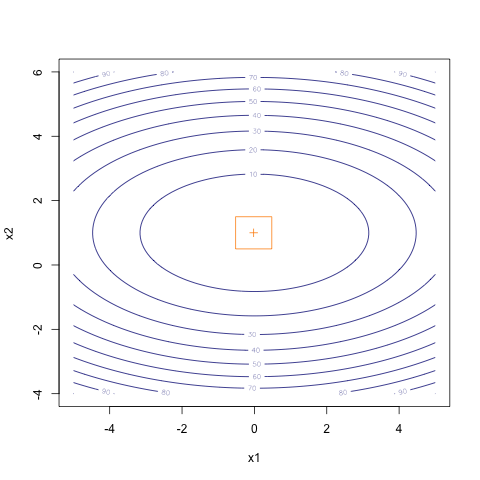

In [1079]:
%%R
x1 <- seq(-5, 5, length.out=100)
x2 <- seq(-4, 6, length.out=100)
y <- basic_function(expand.grid(x1, x2))
contour(x1, x2, matrix(y, length(x1)), col="navy", xlab="x1", ylab="x2")
points(gd_result[1], gd_result[2], col="darkorange", pch=3)
rect(gd_result[1]-0.5, gd_result[2]-0.5, gd_result[1]+0.5, gd_result[2]+0.5, border="darkorange")

#### Example 2 
Linear regression.

In [1080]:
%%R
X <- rnorm(1000,1.5,0.75)
Y <- 5*X + rnorm(1000,1,0.3)
data <- data.frame(X, Y)
data <- data[order(data$X),]

In [1081]:
%%R 
cor.test(data$X, data$Y)


	Pearson's product-moment correlation

data:  data$X and data$Y
t = 379.9, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9961065 0.9969613
sample estimates:
      cor 
0.9965603 



In [1082]:
%%R
regression <- lm(data$Y ~ data$X)
coef(regression)

(Intercept)      data$X 
   1.011477    4.987034 


In [1083]:
%%R
data$LR <- predict(regression, data)

In [1084]:
%%R
regression_function <- function(a, b, x)  return(a * x + b)
a <- 0
b <- 12

In [1085]:
%%R
gradient_descent2 <- function(a, b, x, y, learning_rate = 0.05){
    a_iteration <- 0 
    b_iteration <- 0   
    n <- length(x)
    for(i in 1:n){
        a_iteration <- a_iteration + (-2/n) * x[i] * (y[i] - ((a * x[i]) + b))    
        b_iteration <- b_iteration + (-2/n) * (y[i] - ((a * x[i]) + b))
    } 
    next_a <- a - (learning_rate * a_iteration)
    next_b <- b - (learning_rate * b_iteration)
    next_ab <- list(next_a,next_b)
    return(next_ab)  
}

In [1086]:
%%R
vector_a <- a
vector_b <- b

for(i in 1:300){
  if(i %in% c(50,100,150)){ 
    vector_a <- c(vector_a, a)
    vector_b <- c(vector_b, b)
  }
    
  x0 <- gradient_descent2(a, b, data$X, data$Y)
  
  a <- x0[[1]]
  b <- x0[[2]] 
}

In [1087]:
%%R
vector_a

[1] 0.000000 2.227529 3.721678 4.406812


In [1088]:
%%R
vector_b

[1] 12.000000  5.881918  3.244791  2.035551


In [1089]:
%%R
c(a,b)

[1] 4.931958 1.108685


In [1090]:
%%R
data$it1 <- regression_function(vector_a[1],vector_b[1],data$X)
data$it2 <- regression_function(vector_a[2],vector_b[2],data$X)
data$it3 <- regression_function(vector_a[3],vector_b[3],data$X)
data$it4 <- regression_function(vector_a[4],vector_b[4],data$X)
data$fit <- regression_function(a, b, data$X)

In [1091]:
%%R
sample <- data[c(700:800),]
# sample

In [1092]:
%%R
hc1 <- highchart() %>%
  hc_add_series(data = sample, type = "scatter", 
                hcaes(x = X, y = Y), name = "Y VS X") %>%
    hc_add_series(data = sample, type = "line",
                hcaes(x = X, y = LR), name = "Linear Regression") %>%
    hc_add_series(data = sample, type = "line",
                hcaes(x = X, y = it1), name = "It1") %>%
    hc_add_series(data = sample, type = "line",
                hcaes(x = X, y = it2), name = "It2") %>%
    hc_add_series(data = sample, type = "line",
                hcaes(x = X, y = it3), name = "It3") %>%
    hc_add_series(data = sample, type = "line",
                hcaes(x = X, y = it4), name = "It4") %>%
    hc_add_series(data = sample, type = "line",
                hcaes(x = X, y = fit), name = "Fit") %>%
    hc_title(text = "Iteration Process")%>% 
    hc_add_theme(hc_theme_sparkline())
saveWidget(hc1, 'hc1.html')

In [1093]:
IFrame('hc1.html', 980, 600)

#### Example 3

In [1094]:
%%R
gradient_descent3 <- function(x, y, learn_rate, diff, n, iter) {
  plot(x, y, col = "darkorange", type='b', pch = 1)
  a <- runif(1, 0, 1)
  b <- runif(1, 0, 1)
  y_predict <- a * x + b
  MSE <- sum((y - y_predict) ^ 2) / n
  converged = F
  iterations = 0
  while(converged == F) {
    a_next <- a - learn_rate * ((1 / n) * (sum((y_predict - y) * x)))
    b_next <- b - learn_rate * ((1 / n) * (sum(y_predict - y)))
    a <- a_next
    b <- b_next
    y_predict <- a * x + b
    MSE_next <- sum((y - y_predict) ^ 2) / n
    if(MSE - MSE_next <= diff) {
      abline(b, a) 
      converged = T
      return(paste("Optimal intercept:", b, "Optimal slope:", a))
    }
    iterations = iterations + 1
    if(iterations > iter) { 
      abline(b, a, col="navy") 
      converged = T
      return(paste("Optimal intercept:", b, "Optimal slope:", a))
    }
  }
}

[1] "Optimal intercept: 1.01575585881267 Optimal slope: 4.98460986055432"


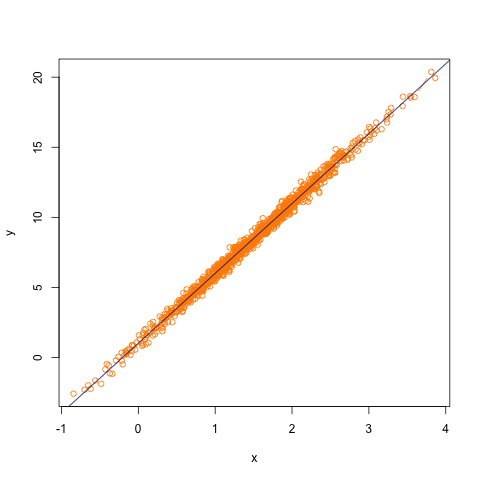

In [1095]:
%%R
gradient_descent3(data$X, data$Y, 0.001, 0.00001, length(data), 300)

#### Example 4

In [1096]:
%%R
feature <- cbind(1,data$X)
target <- data$Y
theta <- matrix(rep(0,ncol(feature)))
i <- 500
alpha <- 0.07

In [1097]:
%%R
cost_function <- function(x,y,t){z=((x%*%t)-y)^2 
                              return(sum(z)/(2*nrow(x)))}
c <- cost_function(feature,target,theta)
c

[1] 42.75286


In [1098]:
%%R
gradient_descent4 <- function(x, y, theta, alpha, iterations){
    gd=list()
    cost=rep(0,iterations)
    for(k in 1:iterations){
        z=rep(0,ncol(x))
        for(i in 1:ncol(x)){
            for(j in 1:nrow(x)){
                z[i]=z[i]+(((x[j,]%*%theta)-y[j])*x[j,i])
            }
        }
        theta = theta-((alpha/nrow(x))*z)
        cost[k] = cost_function(x,y,theta)
    }
    gd$theta = theta
    gd$cost = cost
    gd 
}

In [1099]:
%%R
result <- gradient_descent4(feature,target,theta,alpha,i)
theta_fit = result$theta
theta_fit

         [,1]
[1,] 1.017406
[2,] 4.983675


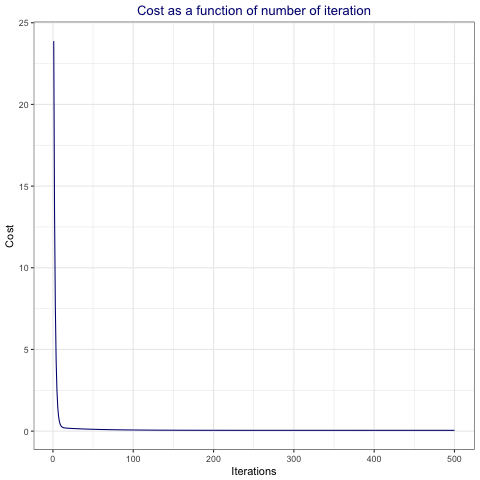

In [1100]:
%%R
data.frame(Cost=result$cost,Iterations=1:i)%>%
ggplot(aes(x=Iterations,y=Cost)) + geom_line(color="navy") + 
ggtitle("Cost as a function of number of iteration") + 
theme_bw() + theme(plot.title = element_text(color="navy",hjust = 0.5))

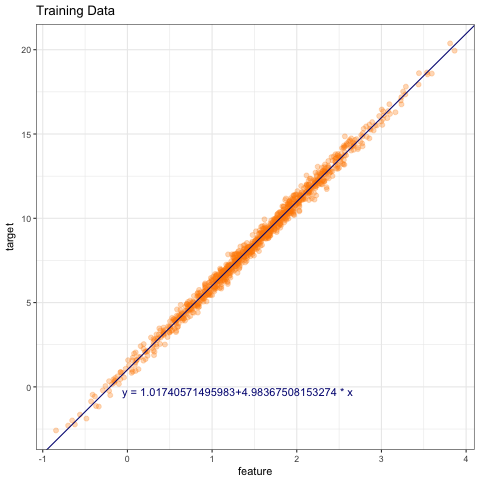

In [1101]:
%%R
ggplot(data=data,aes(x=X,y=Y)) + geom_point(color="darkorange",size=2,alpha=0.3)+
ylab('target')+xlab('feature') + ggtitle ('Training Data')+
theme(plot.title=element_text(colour="navy",hjust=0.5))+
geom_abline(intercept=theta_fit[1],slope=theta_fit[2],col="navy",show.legend=TRUE)+
annotate("text",x=1.3,y=-0.3,color="navy",
         label=paste0("y = ",theta_fit[1],"+",theta_fit[2]," * x")) + theme_bw()

#### Example 5

In [1221]:
%%R
x51 <- runif(300)         
x52 <- runif(300) 
y51 <- (5*x51+x52+2)/10
df51 <- data.frame(x51,x52,y51)
n <- rbinom(300, 1, 0.5)
n[y51<=0.5] <- 0
n[y51>0.5] <- 1
df51$y52 <- n
head(df51)

        x51        x52       y51 y52
1 0.9119095 0.00941098 0.6568958   1
2 0.1937863 0.97847575 0.3947407   0
3 0.1197667 0.63566282 0.3234496   0
4 0.9246811 0.27477762 0.6898183   1
5 0.3610563 0.04023566 0.3845517   0
6 0.9628954 0.96138502 0.7775862   1


In [1222]:
%%R
X5 <- as.matrix(df51[,c(1,2)])
X5 <- cbind(rep(1,nrow(X5)),X5)
Y5 <- as.matrix(df51$y52)

In [1223]:
%%R
sigmoid5 <- function(z){return(1/(1+exp(-z)))}

cost5 <- function(theta,X,Y){
    m <- nrow(X)
    g <- sigmoid(X%*%theta)
    J <- (1/m)*sum((-Y*log(g)) - ((1-Y)*log(1-g)))
    return(J)
}

cost5 <- function(X, Y, theta){
    m = nrow(X)
    g = sigmoid(X %*% theta)
    return((1/m) * (((-t(Y) %*% log(g)) - t(1-Y) %*% log(1 - g))))
}

gradient5 = function(X, Y, theta){
    m = nrow(X)
    g = sigmoid(X %*% theta)
    (1/m) * (t(X) %*% (g - Y))
}

In [1224]:
%%R
theta5 <- rep(0,ncol(X5))
alpha5 = 0.001
inter5 = 1000
for (i in 1:inter5){theta5 = theta5 - alpha5 * gradient5(X5, Y5, theta5)}
print(theta5)

           [,1]
    -0.00536796
x51  0.12258567
x52  0.01936827


In [1225]:
%%R
fit5 = (-theta5[1,1] - (theta5[2,1] * X5)) / theta5[3,1]
fit5[1,]

                  x51        x52 
-6.0520471 -5.4945048  0.2175882 


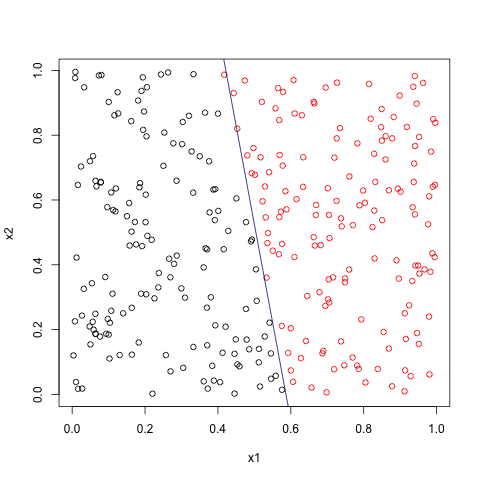

In [1233]:
%%R
plot(df51$x51,df51$x52,col=as.factor(df51$y52),xlab="x1",ylab="x2")
abline(3.55, fit5[1,1], col="navy") 

#### Example 1
The gradient descent algorithm is applied to find a local minimum of the function $f(x) = x^4 − 5 * x^3 + 2$, with derivative $f'(x) = 4 * x^3 − 15 * x^2$. 

In [1264]:
cur_x = 6 # The algorithm starts at x=6
gamma = 0.01 # step size multiplier
precision = 0.00001
previous_step_size = cur_x
a1, b1, c1, l1, m1 = 1, -5, 2, 4, 3

def f(x): 
    y = a1 * x**l1 + b1 * x**m1 + c1
    return y

def df(x):
    y = a1 * l1 * x**(l1-1) + b1 * m1 * x**(m1-1)
    return y

while previous_step_size > precision:
    prev_x = cur_x
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    
print("The local minimum occurs at %f" % cur_x)

The local minimum occurs at 3.749993


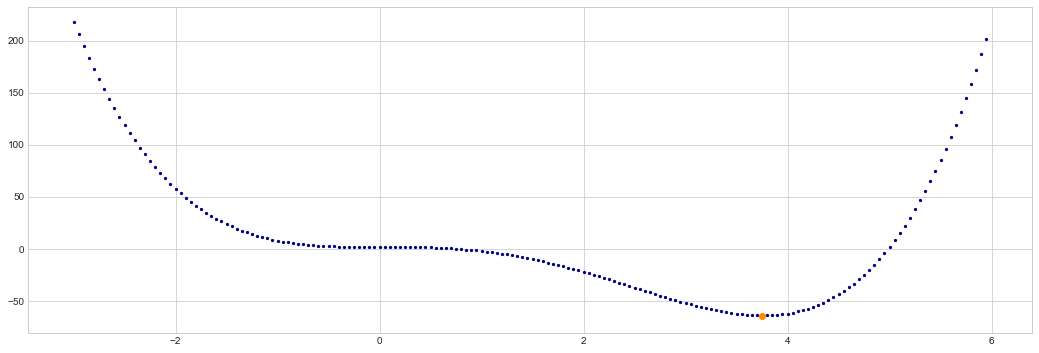

In [1265]:
plt.figure(figsize = (18, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(np.arange(-3, 6, 0.05), f(np.arange(-3, 6, 0.05)), s=5, c='navy')
plt.scatter(cur_x, f(cur_x), c='darkorange');

In [694]:
x0 = np.linspace(-2., 2., 15)
y0 = np.linspace(-1., 3., 15)
def f1(x, y):
    z = (1 - x) ** 2 + 100 * (y - x**2)**2
    return (z)
z = f1(x0, y0)

w_old = np.array([0, 0]).reshape((2,1))
w_new = np.array([-1.8,-.8]).reshape((2,1))
gamma = .0002 # the learning rate
nu = .00001 # the precision

def f1_primew1(w1, w2):
    return -2 * (1 - w1) - 400 * (w2 - w1**2) * w1

def f1_primew2(w1, w2):
    return 200 * (w2 - w1**2)

# Gradient Vector
def g_vec(w1, w2):
    return np.array([f1_primew1(w1, w2), f1_primew2(w1, w2)]).reshape((2,1))

# Perform Gradient Descent
r = 0
while np.linalg.norm(w_old - w_new) > nu:
    w_old = w_new
    w_new = w_old - gamma * g_vec(w_old[0,:], w_old[1,:])
    r = r + 1

print (r)
print (w_new)


23374
[[ 0.9465]
 [ 0.8956]]


#### Example 2
The example of algorithms with coefficients is to find regression parameters that fit the data. They can be optimized using gradient descent.

In [804]:
def gradient_descent1(x, y, iters, alpha):
    costs = []
    predictions = []
    n = y.size 
    theta = np.random.rand(2)
    history = [theta] 
    
    for i in range(iters):
        prediction = np.dot(x, theta)
        if i % 10 == 0: predictions.append(prediction)
        
        error = prediction - y 
        cost = np.sum(error ** 2) / (2 * n)
        costs.append(cost)

        gradient = x.T.dot(error)/n 
        theta = theta - alpha * gradient  
        history.append(theta)

    return history, costs, predictions

In [805]:
x1, y1 = make_regression(n_samples = 100, n_features=1, n_informative=1, noise=20, random_state=0)

In [806]:
slope1, intercept1, _,_,_ = sp.stats.linregress(x1[:,0],y1)
fit1 = x1[:,0] * slope1 + intercept1

In [807]:
x1 = np.c_[np.ones(x1.shape[0]), x1] 
alpha1 = 0.05 
iters1 = 1000 
history1, cost1, predictions1 = gradient_descent1(x1, y1, iters1, alpha1)
theta1 = history1[-1]

In [808]:
print("Gradient Descent: {:.2f}, {:.2f}".format(theta1[0], theta1[1]))
print("Least Squares: {:.2f}, {:.2f}".format(intercept1, slope1))

Gradient Descent: -1.63, 42.85
Least Squares: -1.63, 42.85


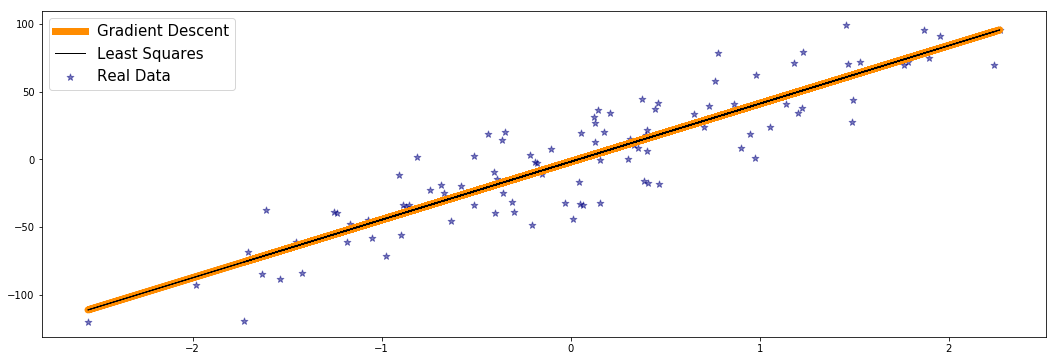

In [809]:
plt.figure(figsize = (18, 6))
plt.scatter(x1[:, -1], y1, c='navy', s=50, marker='*', alpha=0.5, label='Real Data')
plt.plot(x1[:, -1], predictions1[-1], c='darkorange', linewidth=7, label='Gradient Descent')
plt.plot(x1[:, -1], fit1, c='black', linewidth=1, label='Least Squares')
plt.legend(fontsize=15);

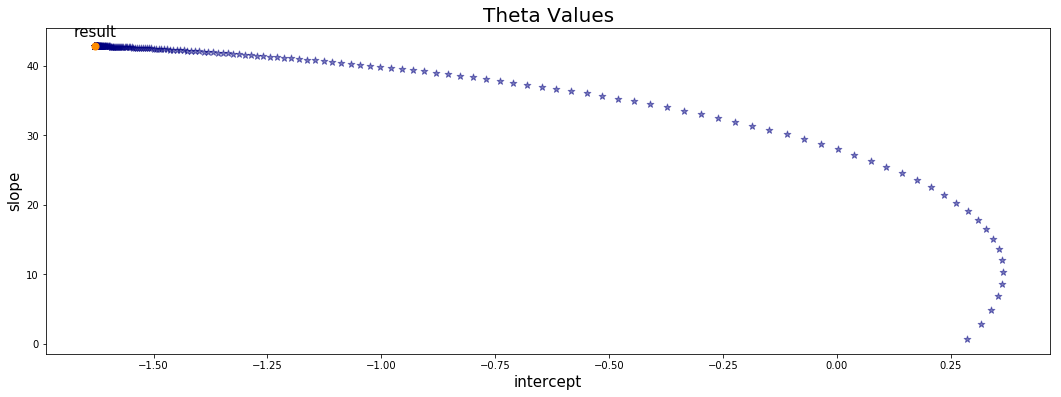

In [810]:
history1 = np.array(history1)
plt.figure(figsize = (18, 6))
plt.scatter(history1[:, 0], history1[:, 1], c='navy', s=50, marker='*', alpha=0.5)
plt.scatter(theta1[0], theta1[1], c='darkorange', s=50)
plt.annotate('result', xy=(theta1[0], theta1[1]+1), ha='center', va='bottom', fontsize=15)
plt.title('Theta Values', fontsize=20)
plt.xlabel('intercept', fontsize=15)
plt.ylabel('slope', fontsize=15);

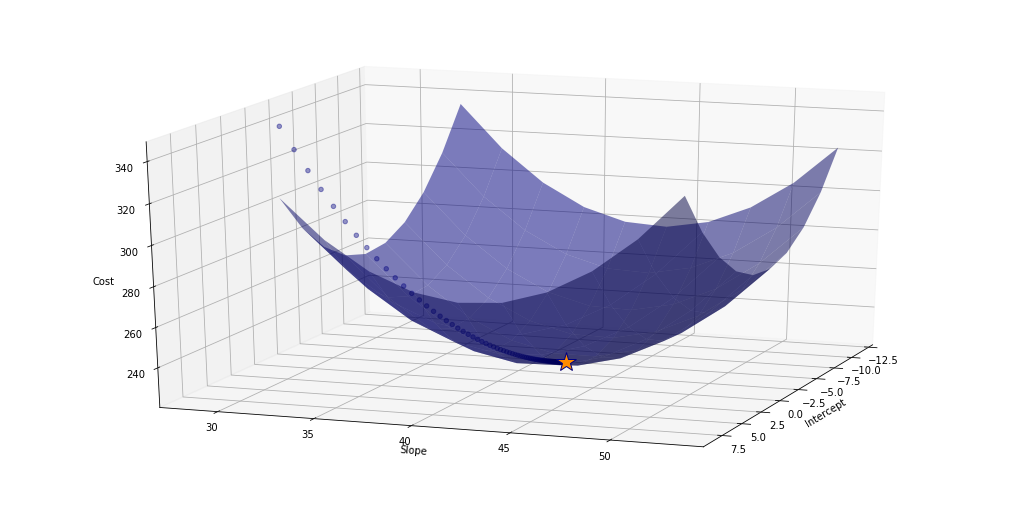

In [821]:
def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

b1 = np.linspace(theta1[0] - 10 , theta1[0] + 10, 10)
a1 = np.linspace(theta1[1] - 10 , theta1[1] + 10, 10)

A1, B1 = np.meshgrid(a1, b1)

z1 = np.array([error(x1, y1, theta) 
               for theta in zip(np.ravel(B1), np.ravel(A1))])
Z1 = z1.reshape(A1.shape)

fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(B1, A1, Z1, color='navy', alpha=0.5)
ax.scatter(history1[21:, 0], history1[21:, 1], cost1[20:], color='navy', alpha=0.4)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=20., azim=20)
ax.plot([theta1[0]], [theta1[1]], [cost1[-1]] , 
        markerfacecolor='darkorange', markeredgecolor='navy', marker='*', markersize=20);

#### Example 3
Let's animate the iteration process.

In [322]:
a2, b2, n2 = 3., 8., 100 
def linear_function(a, b, x): return a * np.array(x) + b
x2 = np.linspace(0., 3., n2)
y2 = linear_function(a2, b2, x2) + np.random.rand(n2)

In [323]:
def sum_squared_errors(y, y_predict): return ((y - y_predict) ** 2).sum()
def loss_function(y, a, b, x): return sum_squared_errors(y, linear_function(a, b, x))
def avg_loss_function(y, a, b, x, n): return np.sqrt(loss_function(y, a, b, x) / n)

In [324]:
a_guess2, b_guess2 = -3., 3.
avg_loss_function(y2, a_guess2, b_guess2, x2, n2)

15.3989

In [325]:
learning_rate2 = 0.001
def update_function():
    global a_guess2, b_guess2
    y_predict2 = linear_function(a_guess2, b_guess2, x2)
    dydb2 = 2 * (y_predict2 - y2)
    dyda2 = x2 * dydb2
    a_guess2 -= learning_rate2 * dyda2.mean()
    b_guess2 -= learning_rate2 * dydb2.mean()

In [326]:
fig = plt.figure(figsize=(13.5, 5.5))
plt.scatter(x2, y2, c='navy', s=50, marker='*')
line, = plt.plot(x2, linear_function(a_guess2, b_guess2, x2), c='darkorange')
plt.close()

def animate(i):
    line.set_ydata(linear_function(a_guess2, b_guess2, x2))
    for i in range(100): update_function()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=200)
ani

In [327]:
print(a_guess2, b_guess2)

3.01689723794 8.4423384818


In [328]:
avg_loss_function(y2, a_guess2, b_guess2, x2, n2)

0.2912

#### Example 4
Let’s implement gradient descent to classify the data.

In [1243]:
(x3, y3) = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.5, random_state=20)
x3 = np.c_[np.ones((x3.shape[0])), x3]
w3 = np.random.uniform(size=(x3.shape[1],))

In [1244]:
def sigmoid_activation(x): return 1.0 / (1 + np.exp(-x))

In [1245]:
loss_history3 = []
epochs3, alpha3 = 100, 0.05
for epoch in np.arange(0, epochs3):
    predictions3 = sigmoid_activation(x3.dot(w3))
    error3 = predictions3 - y3
    loss3 = np.sum(error3 ** 2)
    loss_history3.append(loss3)
    gradient3 = x3.T.dot(error3) / x3.shape[0]
    w3 += -alpha3 * gradient3
fit3 = (-w3[0] - (w3[1] * x3)) / w3[2]

In [1246]:
activations3 = []
labels3 = []
for i in range(300):
    activation3 = sigmoid_activation(x3[i].dot(w3))
    activations3.append(activation3)
    label3 = 0 if activation3 < 0.5 else 1
    labels3.append(label3)
for i in range(10):    
    print("activation={:.4f}; predicted_label={}, true_label={}".format(activations3[i], labels3[i], y3[i]))

activation=0.0097; predicted_label=0, true_label=0
activation=0.0005; predicted_label=0, true_label=0
activation=0.9503; predicted_label=1, true_label=1
activation=0.0194; predicted_label=0, true_label=0
activation=0.9608; predicted_label=1, true_label=1
activation=0.9612; predicted_label=1, true_label=1
activation=0.0043; predicted_label=0, true_label=0
activation=0.0068; predicted_label=0, true_label=0
activation=0.0080; predicted_label=0, true_label=0
activation=0.9977; predicted_label=1, true_label=1


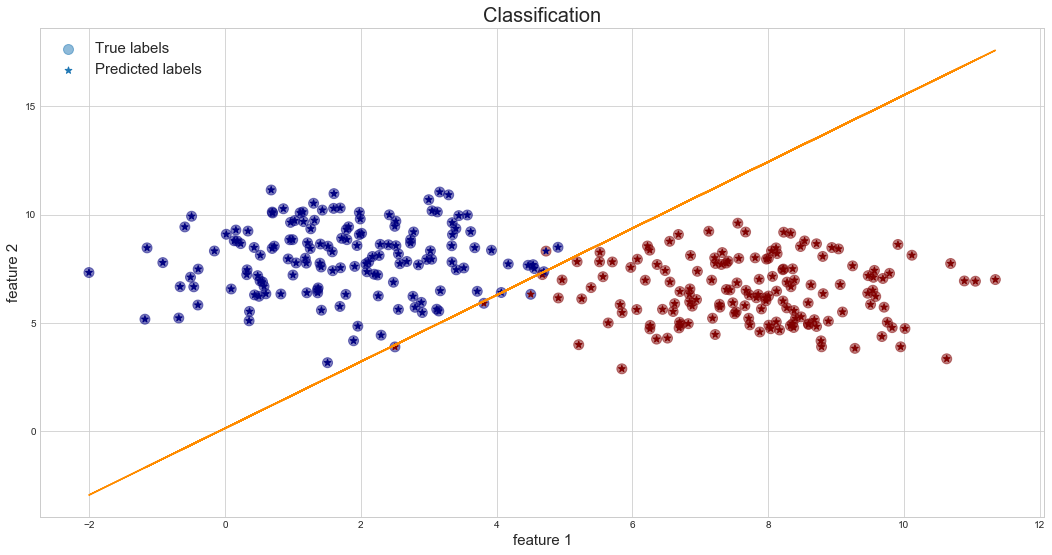

In [1266]:
plt.figure(figsize=(18, 9))
plt.scatter(x3[:, 1], x3[:, 2], c=y3, marker='o', s=100, alpha=0.5, cmap='jet', label='True labels')
plt.scatter(x3[:, 1], x3[:, 2], c=labels3, s=50, marker='*', cmap='jet', label='Predicted labels')
plt.plot(x3, fit3, c='darkorange')
plt.title("Classification", fontsize=20)
plt.xlabel("feature 1", fontsize=15)
plt.ylabel("feature 2", fontsize=15)
plt.legend(fontsize=15);

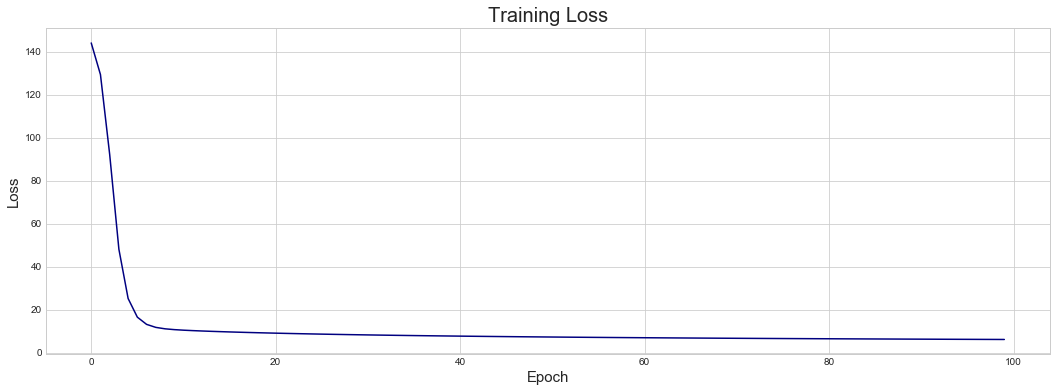

In [1267]:
plt.figure(figsize=(18, 6))
plt.plot(np.arange(0, epochs3), loss_history3, c='navy')
plt.title("Training Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15);

In [1268]:
def normalize_features(data):
    mu, sigma = data.mean(), data.std()
    
    if (sigma == 0).any():
        raise Exception("One of the features had the same value for all samples and could not be normalized.")
        
    data_normalized = (data - mu) / sigma
    return data_normalized, mu, sigma
def sgd_classification(data, target):
    # Normalize features
    X, mu, sigma = normalize_features(data)
    y = target
    
    # Fit the model
    clf = SGDClassifier(loss="hinge", alpha=0.01, n_iter=200, fit_intercept=True)
    clf.fit(X, y)

    coefficients = clf.coef_
    mean_accuracy = clf.score(X, y)
    return clf.predict(X), mean_accuracy

In [1269]:
sgd_predictions3 = sgd_classification(x3, y3)
print ('SGDClassifier, mean accuracy = {}'.format(sgd_predictions3[1]))

SGDClassifier, mean accuracy = 0.99


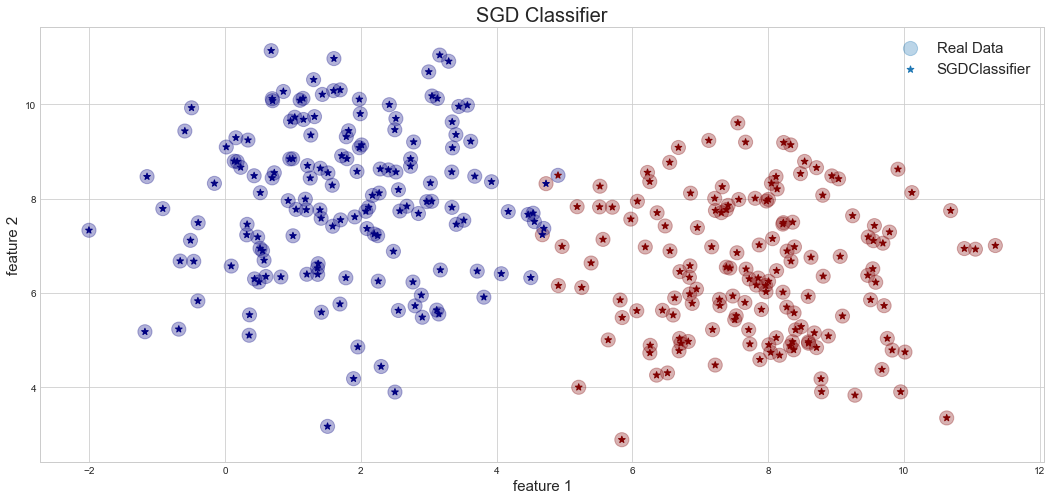

In [1270]:
plt.figure(figsize=(18, 8))
plt.scatter(x3[:, 1], x3[:, 2], c=y3, s=200, marker='o', alpha=0.3, cmap='jet', label='Real Data')
plt.scatter(x3[:, 1], x3[:, 2], c=sgd_predictions3[0], s=50, marker='*', cmap='jet', label='SGDClassifier')
plt.title("SGD Classifier", fontsize=20)
plt.xlabel("feature 1", fontsize=15)
plt.ylabel("feature 2", fontsize=15)
plt.legend(fontsize=15);

#### Example 5
Let’s implement gradient descent to predict the target values in the case of regression.

In [1271]:
x4, y4 = make_regression(n_samples = 1000, n_features=5, n_informative=4, 
                       noise=20, random_state=0)
df_x4 = pd.DataFrame({'x1':x4[:,0],'x2':x4[:,1],'x3':x4[:,2], 'x4':x4[:,3],'x5':x4[:,4]})

In [1272]:
def compute_cost(features, values, theta):
    
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2 * len(values))

    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        delta = (np.dot((values - np.dot(features, theta)), features)) / len(values)
        theta = theta + alpha * delta
        cost_history.append(compute_cost(features, values, theta))

    return theta, pd.Series(cost_history)

def predictions(features, values):

    # Normalize features
    features, mu, sigma = normalize_features(features)
    
    # Add a column of 1s (y intercept)
    features['ones'] = np.ones(len(values))
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 
    num_iterations = 100 

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = \
    gradient_descent(features_array, values_array, theta_gradient_descent, alpha, num_iterations)
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, theta_gradient_descent

In [1273]:
def sgd_predictions(data, target):
    # Normalize features
    X, mu, sigma = normalize_features(data)
    y = target
    
    # Fit the model
    clf = SGDRegressor()
    clf.fit(X, y)

    coefficients = clf.coef_
    r2 = clf.score(X, y)
    return clf.predict(X), coefficients, r2

In [1274]:
predictions4 = predictions(df_x4, y4)
print ('Coefficients')
print ('x1 {}'.format(predictions4[1][0]))
print ('x2 {}'.format(predictions4[1][1]))
print ('x3 {}'.format(predictions4[1][2]))
print ('x4 {}'.format(predictions4[1][3]))
print ('x5 {}'.format(predictions4[1][4]))

Coefficients
x1 10.089763319872928
x2 1.1182767127712439
x3 62.49409713008625
x4 25.51959359637496
x5 41.62031486587244


In [1275]:
sgd_predictions4 = sgd_predictions(df_x4, y4)
print ('Coefficients')
print ('x1 {}'.format(sgd_predictions4[1][0]))
print ('x2 {}'.format(sgd_predictions4[1][1]))
print ('x3 {}'.format(sgd_predictions4[1][2]))
print ('x4 {}'.format(sgd_predictions4[1][3]))
print ('x5 {}'.format(sgd_predictions4[1][4]))

Coefficients
x1 9.979526938224739
x2 1.3156588634911852
x3 62.50347523072793
x4 25.594340422849484
x5 41.53982581069497


In [1276]:
print ("Theta Gradient Descent, R^2 = {}".format(r2_score(y4, predictions4[0])))
print ('SGDRegressor, R^2 = {}'.format(sgd_predictions4[2]))

Theta Gradient Descent, R^2 = 0.9415306185830312
SGDRegressor, R^2 = 0.9415160488442862


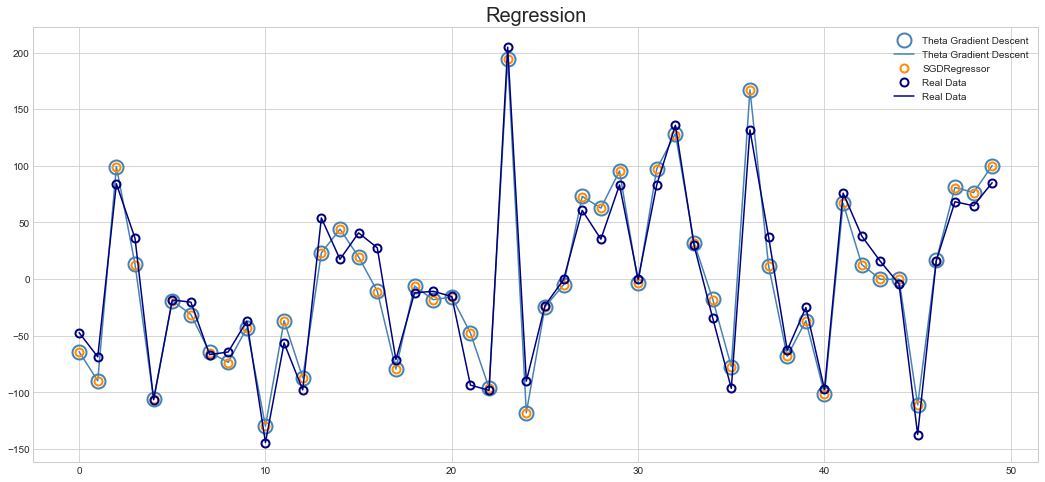

In [1278]:
plt.figure(figsize=(18, 8))
plt.plot(predictions4[0][:50], 'o', markersize=14, label = "Theta Gradient Descent",
         markeredgecolor='steelblue', markerfacecolor="None", markeredgewidth=2)
plt.plot(predictions4[0][:50], color='steelblue', label = "Theta Gradient Descent")
plt.plot(sgd_predictions4[0][:50], 'o', markersize=8, label = "SGDRegressor",
         markeredgecolor='darkorange', markerfacecolor="None", markeredgewidth=2)
#plt.plot(sgd_predictions4[0][:50]+3, color='darkorange', label = "SGDRegressor")
plt.plot(y4[:50], 'o', markersize=8, label = "Real Data",
         markeredgecolor='navy', markerfacecolor="None", markeredgewidth=2)
plt.plot(y4[:50], color='navy', label = "Real Data")
plt.title("Regression", fontsize=20)
plt.legend();